In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [247]:
housing_df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [248]:
housing_df.shape

(1460, 81)

In [249]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [250]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Separate numerical variables to work on that**

In [251]:
housing_numerical_df = housing_df.select_dtypes(include=['float64', 'int64'])
housing_numerical_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [252]:
housing_numerical_df.shape

(1460, 38)

In [253]:
housing_numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

**Drop columns whose values are numbers but there are only few, so can be treated as categorical**

In [254]:
housing_numerical_df = housing_numerical_df.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
housing_numerical_df.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


In [255]:
housing_numerical_df.shape

(1460, 21)

**percentile description to check for outliers in numerical values**

In [256]:
housing_numerical_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


**Remove data below 10% and above 90%**

(1439, 81)

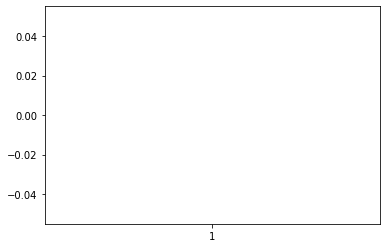

In [257]:
plt.boxplot(housing_df['MasVnrArea'])
Quartile1 = housing_df['MasVnrArea'].quantile(0.1)
Quartile3 = housing_df['MasVnrArea'].quantile(0.9)
IQR = Quartile3 - Quartile1
housing_df = housing_df[(housing_df['MasVnrArea'] >= Quartile1 - 1.5*IQR) & 
                      (housing_df['MasVnrArea'] <= Quartile3 + 1.5*IQR)]
housing_df.shape

(1438, 81)

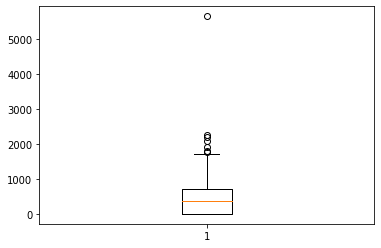

In [258]:
plt.boxplot(housing_df['BsmtFinSF1'])
Quartile1 = housing_df['BsmtFinSF1'].quantile(0.1)
Quartile3 = housing_df['BsmtFinSF1'].quantile(0.9)
IQR = Quartile3 - Quartile1
housing_df = housing_df[(housing_df['BsmtFinSF1'] >= Quartile1 - 1.5*IQR) & 
                      (housing_df['BsmtFinSF1'] <= Quartile3 + 1.5*IQR)]
housing_df.shape

(1346, 81)

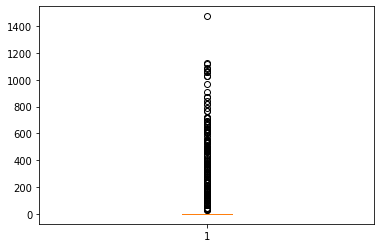

In [259]:
plt.boxplot(housing_df['BsmtFinSF2'])
Quartile1 = housing_df['BsmtFinSF2'].quantile(0.1)
Quartile3 = housing_df['BsmtFinSF2'].quantile(0.9)
IQR = Quartile3 - Quartile1
housing_df = housing_df[(housing_df['BsmtFinSF2'] >= Quartile1 - 1.5*IQR) & 
                      (housing_df['BsmtFinSF2'] <= Quartile3 + 1.5*IQR)]
housing_df.shape

(1329, 81)

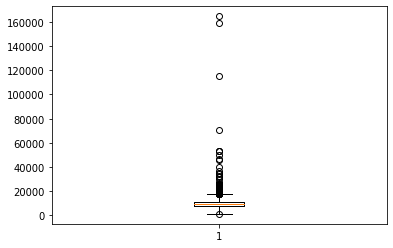

In [260]:
plt.boxplot(housing_df['LotArea'])
Quartile1 = housing_df['LotArea'].quantile(0.1)
Quartile3 = housing_df['LotArea'].quantile(0.9)
IQR = Quartile3 - Quartile1
housing_df = housing_df[(housing_df['LotArea'] >= Quartile1 - 1.5*IQR) & 
                      (housing_df['LotArea'] <= Quartile3 + 1.5*IQR)]
housing_df.shape

(1231, 81)

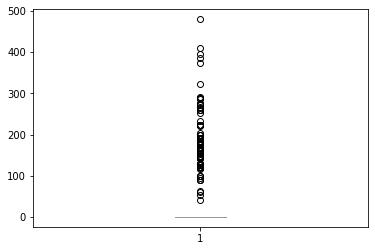

In [261]:
plt.boxplot(housing_df['ScreenPorch'])
Quartile1 = housing_df['ScreenPorch'].quantile(0.1)
Quartile3 = housing_df['ScreenPorch'].quantile(0.9)
IQR = Quartile3 - Quartile1
housing_df = housing_df[(housing_df['ScreenPorch'] >= Quartile1 - 1.5*IQR) & 
                      (housing_df['ScreenPorch'] <= Quartile3 + 1.5*IQR)]
housing_df.shape

(1227, 81)

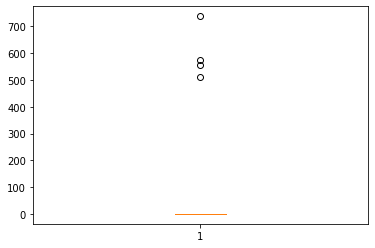

In [262]:
plt.boxplot(housing_df['PoolArea'])
Quartile1 = housing_df['PoolArea'].quantile(0.1)
Quartile3 = housing_df['PoolArea'].quantile(0.9)
IQR = Quartile3 - Quartile1
housing_df = housing_df[(housing_df['PoolArea'] >= Quartile1 - 1.5*IQR) & 
                      (housing_df['PoolArea'] <= Quartile3 + 1.5*IQR)]
housing_df.shape

(1182, 81)

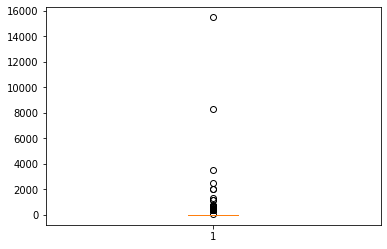

In [263]:
plt.boxplot(housing_df['MiscVal'])
Quartile1 = housing_df['MiscVal'].quantile(0.1)
Quartile3 = housing_df['MiscVal'].quantile(0.9)
IQR = Quartile3 - Quartile1
housing_df = housing_df[(housing_df['MiscVal'] >= Quartile1 - 1.5*IQR) & 
                      (housing_df['MiscVal'] <= Quartile3 + 1.5*IQR)]
housing_df.shape

(1180, 81)

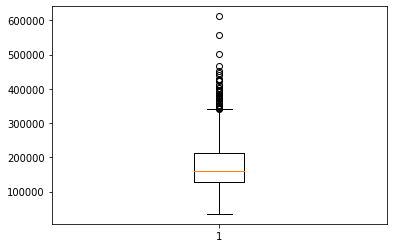

In [264]:
plt.boxplot(housing_df['SalePrice'])
Quartile1 = housing_df['SalePrice'].quantile(0.1)
Quartile3 = housing_df['SalePrice'].quantile(0.9)
IQR = Quartile3 - Quartile1
housing_df = housing_df[(housing_df['SalePrice'] >= Quartile1 - 1.5*IQR) & 
                      (housing_df['SalePrice'] <= Quartile3 + 1.5*IQR)]
housing_df.shape

In [265]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1180 non-null   int64  
 1   MSSubClass     1180 non-null   int64  
 2   MSZoning       1180 non-null   object 
 3   LotFrontage    984 non-null    float64
 4   LotArea        1180 non-null   int64  
 5   Street         1180 non-null   object 
 6   Alley          79 non-null     object 
 7   LotShape       1180 non-null   object 
 8   LandContour    1180 non-null   object 
 9   Utilities      1180 non-null   object 
 10  LotConfig      1180 non-null   object 
 11  LandSlope      1180 non-null   object 
 12  Neighborhood   1180 non-null   object 
 13  Condition1     1180 non-null   object 
 14  Condition2     1180 non-null   object 
 15  BldgType       1180 non-null   object 
 16  HouseStyle     1180 non-null   object 
 17  OverallQual    1180 non-null   int64  
 18  OverallC

**Drop columns have most of the values are null and unwanted**

* Id - its just the id of the data
* Alley, FireplaceQu, PoolQC, Fence, MiscFeature  - since most of the data are null

In [266]:
housing_df = housing_df.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'GarageYrBlt'], axis =1)

In [267]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1180 non-null   int64  
 1   MSZoning       1180 non-null   object 
 2   LotFrontage    984 non-null    float64
 3   LotArea        1180 non-null   int64  
 4   Street         1180 non-null   object 
 5   LotShape       1180 non-null   object 
 6   LandContour    1180 non-null   object 
 7   Utilities      1180 non-null   object 
 8   LotConfig      1180 non-null   object 
 9   LandSlope      1180 non-null   object 
 10  Neighborhood   1180 non-null   object 
 11  Condition1     1180 non-null   object 
 12  Condition2     1180 non-null   object 
 13  BldgType       1180 non-null   object 
 14  HouseStyle     1180 non-null   object 
 15  OverallQual    1180 non-null   int64  
 16  OverallCond    1180 non-null   int64  
 17  YearBuilt      1180 non-null   int64  
 18  YearRemo

In [268]:
housing_df.shape

(1180, 74)

In [269]:
housing_df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      196
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64

In [270]:
housing_df['LotFrontage'].fillna(float(housing_df['LotFrontage'].mean()), inplace=True)
housing_df['MasVnrType'].fillna(housing_df['MasVnrType'].mode()[0], inplace=True)
housing_df['MasVnrArea'].fillna(float(housing_df['MasVnrArea'].mean()), inplace=True)
housing_df['BsmtQual'].fillna(housing_df['BsmtQual'].mode()[0], inplace=True)
housing_df['BsmtCond'].fillna(housing_df['BsmtCond'].mode()[0], inplace=True)
housing_df['BsmtExposure'].fillna(housing_df['BsmtExposure'].mode()[0], inplace=True)

housing_df['BsmtFinType1'].fillna(housing_df['BsmtFinType1'].mode()[0], inplace=True)
housing_df['BsmtFinType2'].fillna(housing_df['BsmtFinType2'].mode()[0], inplace=True)
housing_df['Electrical'].fillna(housing_df['Electrical'].mode()[0], inplace=True)
housing_df['GarageType'].fillna(housing_df['GarageType'].mode()[0], inplace=True)
housing_df['GarageFinish'].fillna(housing_df['GarageFinish'].mode()[0], inplace=True)
housing_df['GarageQual'].fillna(housing_df['GarageQual'].mode()[0], inplace=True)
housing_df['GarageCond'].fillna(housing_df['GarageCond'].mode()[0], inplace=True)

In [271]:
housing_df.isna().sum().sum()

0

In [272]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1180 non-null   int64  
 1   MSZoning       1180 non-null   object 
 2   LotFrontage    1180 non-null   float64
 3   LotArea        1180 non-null   int64  
 4   Street         1180 non-null   object 
 5   LotShape       1180 non-null   object 
 6   LandContour    1180 non-null   object 
 7   Utilities      1180 non-null   object 
 8   LotConfig      1180 non-null   object 
 9   LandSlope      1180 non-null   object 
 10  Neighborhood   1180 non-null   object 
 11  Condition1     1180 non-null   object 
 12  Condition2     1180 non-null   object 
 13  BldgType       1180 non-null   object 
 14  HouseStyle     1180 non-null   object 
 15  OverallQual    1180 non-null   int64  
 16  OverallCond    1180 non-null   int64  
 17  YearBuilt      1180 non-null   int64  
 18  YearRemo

**map variables having less number of categorires into numbers**

In [273]:
series1 =  ['Street']
def dataMapping(x):
    return x.map({'Pave': 1, "Grvl": 0})
housing_df[series1] = housing_df[series1].apply(dataMapping)

In [274]:
series1 =  ['Utilities']
def dataMapping(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})
housing_df[series1] = housing_df[series1].apply(dataMapping)

In [275]:
series1 =  ['CentralAir']
def dataMapping(x):
    return x.map({'Y': 1, "N": 0})
housing_df[series1] = housing_df[series1].apply(dataMapping)

**Finding categorical variables and create dummy variables for that**

In [276]:
housing_categorical_df = housing_df.select_dtypes(include=['object'])
housing_categorical_df.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [277]:
dummy_values = pd.get_dummies(housing_categorical_df, drop_first=True)
dummy_values.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [278]:
dummy_values.shape

(1180, 186)

**Drop categorical variables from housing_df**

In [279]:
housing_df = housing_df.drop(list(housing_categorical_df.columns), axis=1)

In [280]:
housing_df = pd.concat([housing_df, dummy_values], axis=1)

In [281]:
housing_df.shape

(1180, 225)

In [282]:
housing_df.head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,1,7,5,2003,2003,196.0,706,0,150,856,1,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,

In [283]:
df_train, df_test = train_test_split(housing_df, train_size = 0.7, random_state=100)

In [284]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [285]:
scaler = MinMaxScaler()

In [286]:
df_train = scaler.fit_transform(df_train)

In [287]:
df_test= scaler.transform(df_test)

**Model Building**

Ridge Regression

In [294]:
params = {'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge = Ridge()
cv_folds = 5
model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = cv_folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge.fit(df_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [295]:
print(model_ridge.best_params_)
print(model_ridge.best_score_)

{'alpha': 1}
-15603.395659688942


In [296]:
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-4.55651931e+01,  5.94698574e+01,  1.14479331e+00, -4.64423029e+03,
        0.00000000e+00,  7.57656167e+03,  6.09293694e+03,  4.74154684e+02,
        8.49586197e+01,  4.51176681e+00,  1.09687642e+01,  1.49745048e+01,
       -4.75219004e+00,  2.11910697e+01,  2.33926858e+03,  1.96833871e+01,
        2.58888620e+01, -1.37360736e+01,  3.18361927e+01,  3.70978186e+03,
       -2.96203006e+03,  2.17231084e+03,  2.41713844e+03, -4.83547593e+03,
       -4.28208538e+03,  1.67261553e+03,  2.09416316e+03,  1.85213141e+03,
        1.46098067e+01,  1.36769398e+01,  1.30527373e+01,  3.32781005e+01,
        4.18812901e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.09338735e+01, -3.57966795e+02,  1.38326738e+04,  4.44916091e+03,
        8.80794428e+03,  7.48094333e+03,  1.82969686e+02, -1.92606127e+03,
        1.15652011e+03,  1.35245251e+03, -1.93390952e+04,  1.64131864e+03,
        4.51892843e+03, -7.64261358e+03, -5.54447363e+03, -3.35166621e+03,
        6.62246353e+03, -

In [293]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9464859951916192


Lasso Regression

In [297]:
lasso = Lasso()
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = cv_folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [298]:
print(model_lasso.best_params_)
print(model_lasso.best_score_)

{'alpha': 100}
-15242.675484631915


In [299]:
alpha = 100
lasso = Lasso(alpha=alpha) 
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [300]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.936874485574512


For question number 1 after doubling the alpha value

In [312]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-7.99519538e+01,  5.74036618e+01,  1.12195747e+00, -2.58068436e+03,
        0.00000000e+00,  7.88455833e+03,  6.07019795e+03,  4.70668936e+02,
        8.51171764e+01,  6.16647360e+00,  1.05052895e+01,  1.61217399e+01,
       -5.53409132e+00,  2.10929348e+01,  1.85103417e+03,  2.11650392e+01,
        2.57048101e+01, -1.55799945e+01,  3.12898632e+01,  3.76461191e+03,
       -2.87348253e+03,  2.10188997e+03,  2.42811163e+03, -4.95422039e+03,
       -4.38933422e+03,  1.71665542e+03,  2.21999160e+03,  1.96163526e+03,
        1.43991071e+01,  1.39239065e+01,  1.40699074e+01,  3.32037433e+01,
        4.26845714e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.81743861e+01, -2.57904428e+02,  1.05578761e+04,  2.07163068e+03,
        6.63126725e+03,  4.86243659e+03, -2.05510600e+02, -1.88917465e+03,
        8.56711379e+02,  2.55009467e+03, -1.58240993e+04,  2.15915813e+03,
        4.53046861e+03, -7.02317972e+03, -3.89320192e+03, -3.16045730e+03,
        5.90086800e+03, -

In [313]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9451845230280257


In [319]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9208703111945371


In [315]:
alpha = 200
lasso = Lasso(alpha=alpha) 
lasso.fit(X_train, y_train) 

Lasso(alpha=200)

In [316]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9302156693873652


In [318]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9148184566458045


In [321]:
alphas = pd.DataFrame(index=X_train.columns, 
                     columns = ['Ridge'])
alphas['Ridge'] = ridge.coef_
alphas['Lasso'] = lasso.coef_

print("Ridge")
print(alphas['Ridge'].max())
print(alphas['Ridge'].idxmax())
print(alphas['Ridge'].min())
print(alphas['Ridge'].idxmin())

print("/////////")
print("Lasso")
print(alphas['Lasso'].max())
print(alphas['Lasso'].idxmax())
print(alphas['Lasso'].min())
print(alphas['Lasso'].idxmin())
#print(alphas.to_string())

print(alphas['Ridge'].nlargest())
print(alphas['Lasso'].nsmallest())

Ridge
31372.368879719423
Neighborhood_StoneBr
-15824.099278078087
LandContour_Low
/////////
Lasso
23354.204527027112
Neighborhood_StoneBr
-11843.203063440915
BsmtQual_Gd
Neighborhood_StoneBr    31372.368880
SaleType_CWD            19630.813504
BsmtExposure_Gd         18381.096490
Neighborhood_Crawfor    18352.926644
Neighborhood_NoRidge    16731.068886
Name: Ridge, dtype: float64
Neighborhood_StoneBr     23354.204527
Neighborhood_NridgHt     15186.139380
BsmtExposure_Gd          15142.165752
SaleCondition_Partial    14289.609588
Neighborhood_Crawfor     13957.237552
Name: Lasso, dtype: float64


In [322]:
print(alphas['Ridge'].nlargest())
print(alphas['Ridge'].nsmallest())
print("////////")
print(alphas['Lasso'].nlargest())
print(alphas['Lasso'].nsmallest())

Neighborhood_StoneBr    31372.368880
SaleType_CWD            19630.813504
BsmtExposure_Gd         18381.096490
Neighborhood_Crawfor    18352.926644
Neighborhood_NoRidge    16731.068886
Name: Ridge, dtype: float64
LandContour_Low   -15824.099278
KitchenQual_Gd    -14001.648711
Condition1_RRAe   -13943.135097
BsmtQual_Gd       -13860.427298
KitchenQual_TA    -13650.402593
Name: Ridge, dtype: float64
////////
Neighborhood_StoneBr     23354.204527
Neighborhood_NridgHt     15186.139380
BsmtExposure_Gd          15142.165752
SaleCondition_Partial    14289.609588
Neighborhood_Crawfor     13957.237552
Name: Lasso, dtype: float64
BsmtQual_Gd      -11843.203063
KitchenQual_Gd    -9759.511077
KitchenQual_TA    -9720.570438
BsmtQual_TA       -7258.333442
BedroomAbvGr      -5404.344759
Name: Lasso, dtype: float64


Removing the five most important predictor variables for question number 3

In [323]:
X_train_new = X_train.drop(['Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'SaleCondition_Partial', 'Neighborhood_Crawfor'], axis=1)

In [324]:
alpha = 200
lasso = Lasso(alpha=alpha) 
lasso.fit(X_train_new, y_train) 

Lasso(alpha=200)

In [328]:
alphas_new = pd.DataFrame(index=X_train_new.columns, 
                     columns = ['Lasso'])
alphas_new['Lasso'] = lasso.coef_

In [330]:
print(alphas_new['Lasso'].nlargest())
print(alphas_new['Lasso'].nsmallest())

Functional_Typ         12167.286750
SaleType_New           11703.141468
OverallQual            11019.063303
Condition1_Norm         7981.311241
Exterior1st_BrkFace     7688.538621
Name: Lasso, dtype: float64
BsmtQual_Gd           -13346.734750
KitchenQual_Gd         -9903.618112
KitchenQual_TA         -9762.939830
BsmtQual_TA            -9399.736291
Neighborhood_NWAmes    -8355.780181
Name: Lasso, dtype: float64
